In [34]:
import pandas as pd
import warnings
# import stats to perform f_oneway test
import scipy.stats as stats
from  matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [5]:
#read csv file
df=pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv')

In [8]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [10]:
#converting Created Date column of type string to datetime datetype
df['Created Date']=pd.to_datetime(df['Created Date'])

In [11]:
#converting Closed Date column of type string to datetime datetype
df['Closed Date']=pd.to_datetime(df['Closed Date'],errors='coerce')

In [12]:
#creating a new column 'Request_Closing_Time' with difference of closed date and created date in hrs
df['Request_Closing_Time']=(df['Closed Date']-df['Created Date']).dt.total_seconds() / 3600
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,NaT,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",NaN
300695,30283424,2015-03-29 00:33:03,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",NaN
300696,30280004,2015-03-29 00:33:02,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",NaN


In [13]:
#Dropping the columns 
df.drop(columns=['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2', 
                 'Intersection Street 2','Intersection Street 1', 'Address Type',
                'Park Facility Name','Park Borough','School Name','School Number', 
                 'School Region', 'School Code', 'School Phone Number', 
                'School Address', 'School City', 'School State','School Zip',
                 'School Not Found', 'School or Citywide Complaint','Vehicle Type'
                ,'Taxi Company Borough', 'Bridge Highway Name', 'Bridge Highway Direction',
                 'Road Ramp', 'Bridge Highway Segment','Garage Lot Name', 'Ferry Direction',
                 'Ferry Terminal Name','Landmark','X Coordinate (State Plane)',
                'Y Coordinate (State Plane)','Due Date', 'Resolution Action Updated Date',
                 'Community Board','Facility Type','Location','Taxi Pick Up Location'],inplace=True)

In [18]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,NaT,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,NaN
300695,30283424,2015-03-29 00:33:03,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,NaN
300696,30280004,2015-03-29 00:33:02,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,NaN


In [20]:
#dropping the row with null values
df.dropna(inplace=True)
df


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299033,30298353,2015-03-31 03:10:24,2015-04-01 00:47:00,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10034.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.866101,-73.919205,21.610000
299100,30289801,2015-03-30 23:33:17,2015-04-01 01:32:00,NYPD,Animal Abuse,In Car,Street/Sidewalk,10306.0,STATEN ISLAND,Closed,The Police Department responded to the complai...,STATEN ISLAND,40.562960,-74.114781,25.978611
299152,30289888,2015-03-30 22:17:05,2015-04-01 04:09:00,NYPD,Derelict Vehicle,With License Plate,Street/Sidewalk,10473.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.812100,-73.859852,29.865278
299323,30295176,2015-03-30 18:00:13,2015-04-02 00:50:00,NYPD,Derelict Vehicle,With License Plate,Street/Sidewalk,10306.0,STATEN ISLAND,Closed,The Police Department reviewed your complaint ...,STATEN ISLAND,40.567356,-74.107716,54.829722


In [22]:
#listing out uniques values in column of dataset df
for uniqueCol in df.columns:
    print(f"Unique value in {uniqueCol}:")
    print(df[uniqueCol].unique())
    print("\n")
    

Unique value in Unique Key:
[32310363 32309934 32309159 ... 30289888 30295176 30291996]


Unique value in Created Date:
<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-31 10:21:14', '2015-03-31 09:54:58', '2015-03-31 09:40:46',
 '2015-03-31 08:53:04', '2015-03-31 07:58:17', '2015-03-31 03:10:24',
 '2015-03-30 23:33:17', '2015-03-30 22:17:05', '2015-03-30 18:00:13',
 '2015-03-30 14:52:46']
Length: 76637, dtype: datetime64[ns]


Unique value in Closed Date:
<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01-01 01:42:00', '2016-01-01 08:27:00',
 '2016-01-01 01:17:00',
 ...
 '2015-04-01 12:47:00', '2015-04-01 03:34:00', '2015-04-01 07:30:00'

In [24]:
#storing numerical value in numeric_data for sum,mean,std, skewness and kurtosis
numeric_data = df.select_dtypes(include='number').drop(columns=['Unique Key'])



In [26]:
# Calclating sum, mean, standard deviation, skewness and kutosis for numerical values
for column in numeric_data.columns:
    sum_column=numeric_data[column].sum()
    mean_column=numeric_data[column].mean()
    std_column=numeric_data[column].std()
    skew_column=numeric_data[column].skew()
    kurtosis_column=numeric_data[column].kurt()
    print(f"{column}")
    print(f"sum:{sum_column}")
    print(f"mean:{mean_column}")
    print(f"standard deviation:{std_column}")
    print(f"skewness:{skew_column}")
    print(f"kurtosis:{kurtosis_column}")
    print("\n")
    

Incident Zip
sum:1228927523.0
mean:10856.058400028269
standard deviation:584.9704207021666
skewness:-2.7765235747073813
kurtosis:41.86899281190253


Latitude
sum:4610261.04546291
mean:40.7259681406946
standard deviation:0.08244446753963622
skewness:0.12423436180266678
kurtosis:-0.7424961233874536


Longitude
sum:-8368453.993500459
mean:-73.92496593258475
standard deviation:0.0786123471449177
skewness:-0.3075143268677471
kurtosis:1.4492061957155506


Request_Closing_Time
sum:481556.3116666667
mean:4.253955863559537
standard deviation:5.826814253389526
skewness:7.4242016189149265
kurtosis:110.71706895571212




In [28]:
#calculating correlaion 
numeric_data.corr()

,Incident Zip,Latitude,Longitude,Request_Closing_Time
Incident Zip,1.000000,-0.497300,0.380715,0.061296
Latitude,-0.497300,1.000000,0.369484,0.020664
Longitude,0.380715,0.369484,1.000000,0.122130
Request_Closing_Time,0.061296,0.020664,0.122130,1.000000


In [30]:
numeric_data.describe()

,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,113202.000000,113202.000000,113202.000000,113202.000000
mean,10856.058400,40.725968,-73.924966,4.253956
std,584.970421,0.082444,0.078612,5.826814
min,83.000000,40.499997,-74.252182,0.016667
25%,10314.000000,40.669134,-73.971405,1.250000
50%,11209.000000,40.718104,-73.930774,2.683333
75%,11238.000000,40.784174,-73.875352,5.300000
max,11697.000000,40.912869,-73.700837,160.950000


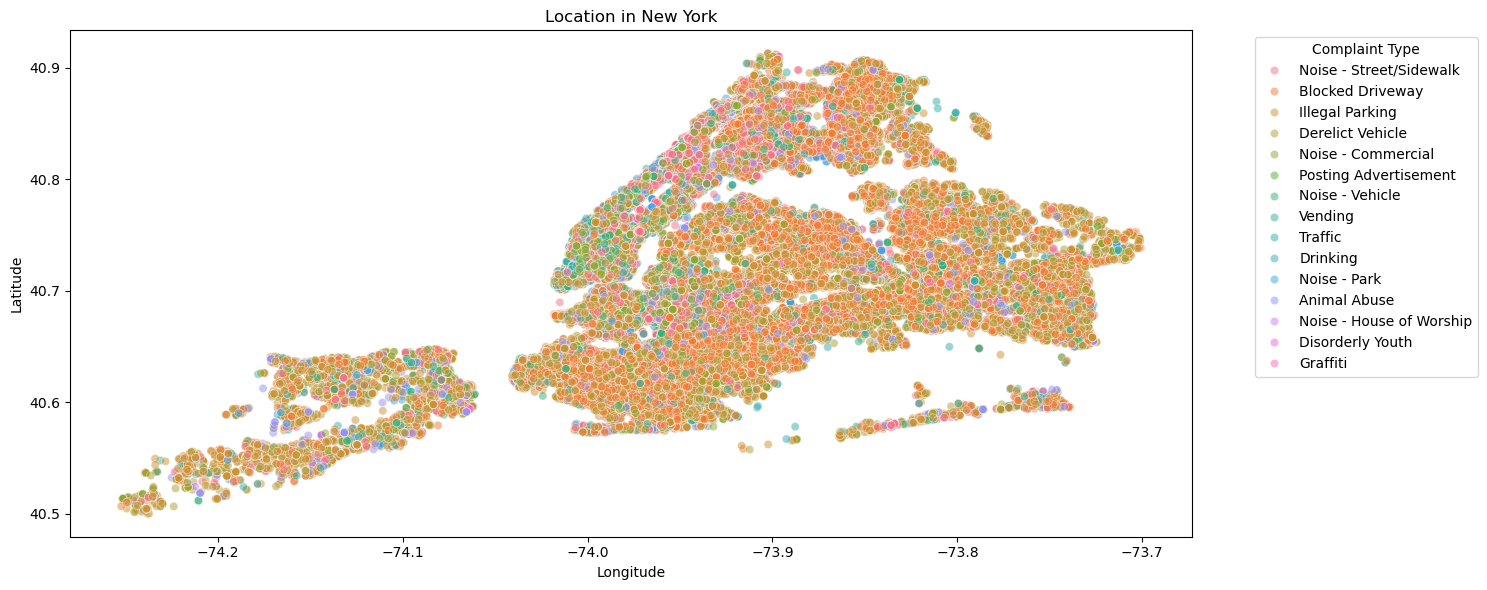

In [36]:
# Set figure size BEFORE plotting
plt.figure(figsize=(15,6))
# Scatter plot with hue for Complaint Type
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Complaint Type', alpha=0.5)
# Title and axis labels
plt.title('Location in New York')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # optional: move legend
plt.tight_layout()
plt.show()



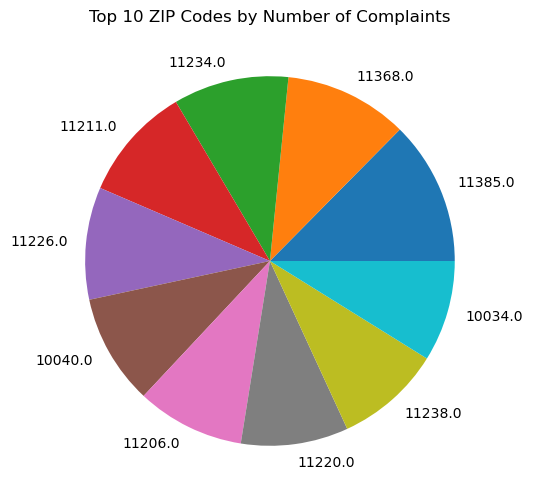

In [38]:
#storing unique value count of Incident Zip in zip_count(y-axis)
zip_count=df['Incident Zip'].value_counts()
# storing top 10 Incident Zip count in Zip_Frequent_Values(x-axis)
Zip_Frequent_Values=zip_count.head(10)
#converting index to string for labeling
Zip_Frequent_Values.index = Zip_Frequent_Values.index.astype(str)
plt.figure(figsize=(12,6))
#plot pie chart for Incident Zip with top 10 incident zip and their occurence
plt.pie(Zip_Frequent_Values.values, labels=Zip_Frequent_Values.index)
#title of pie chart
plt.title('Top 10 ZIP Codes by Number of Complaints');


In [40]:
#storing unique value count of complaint type in Complaint_Type(y-axis)
Complaint_Type=df['Complaint Type'].value_counts()

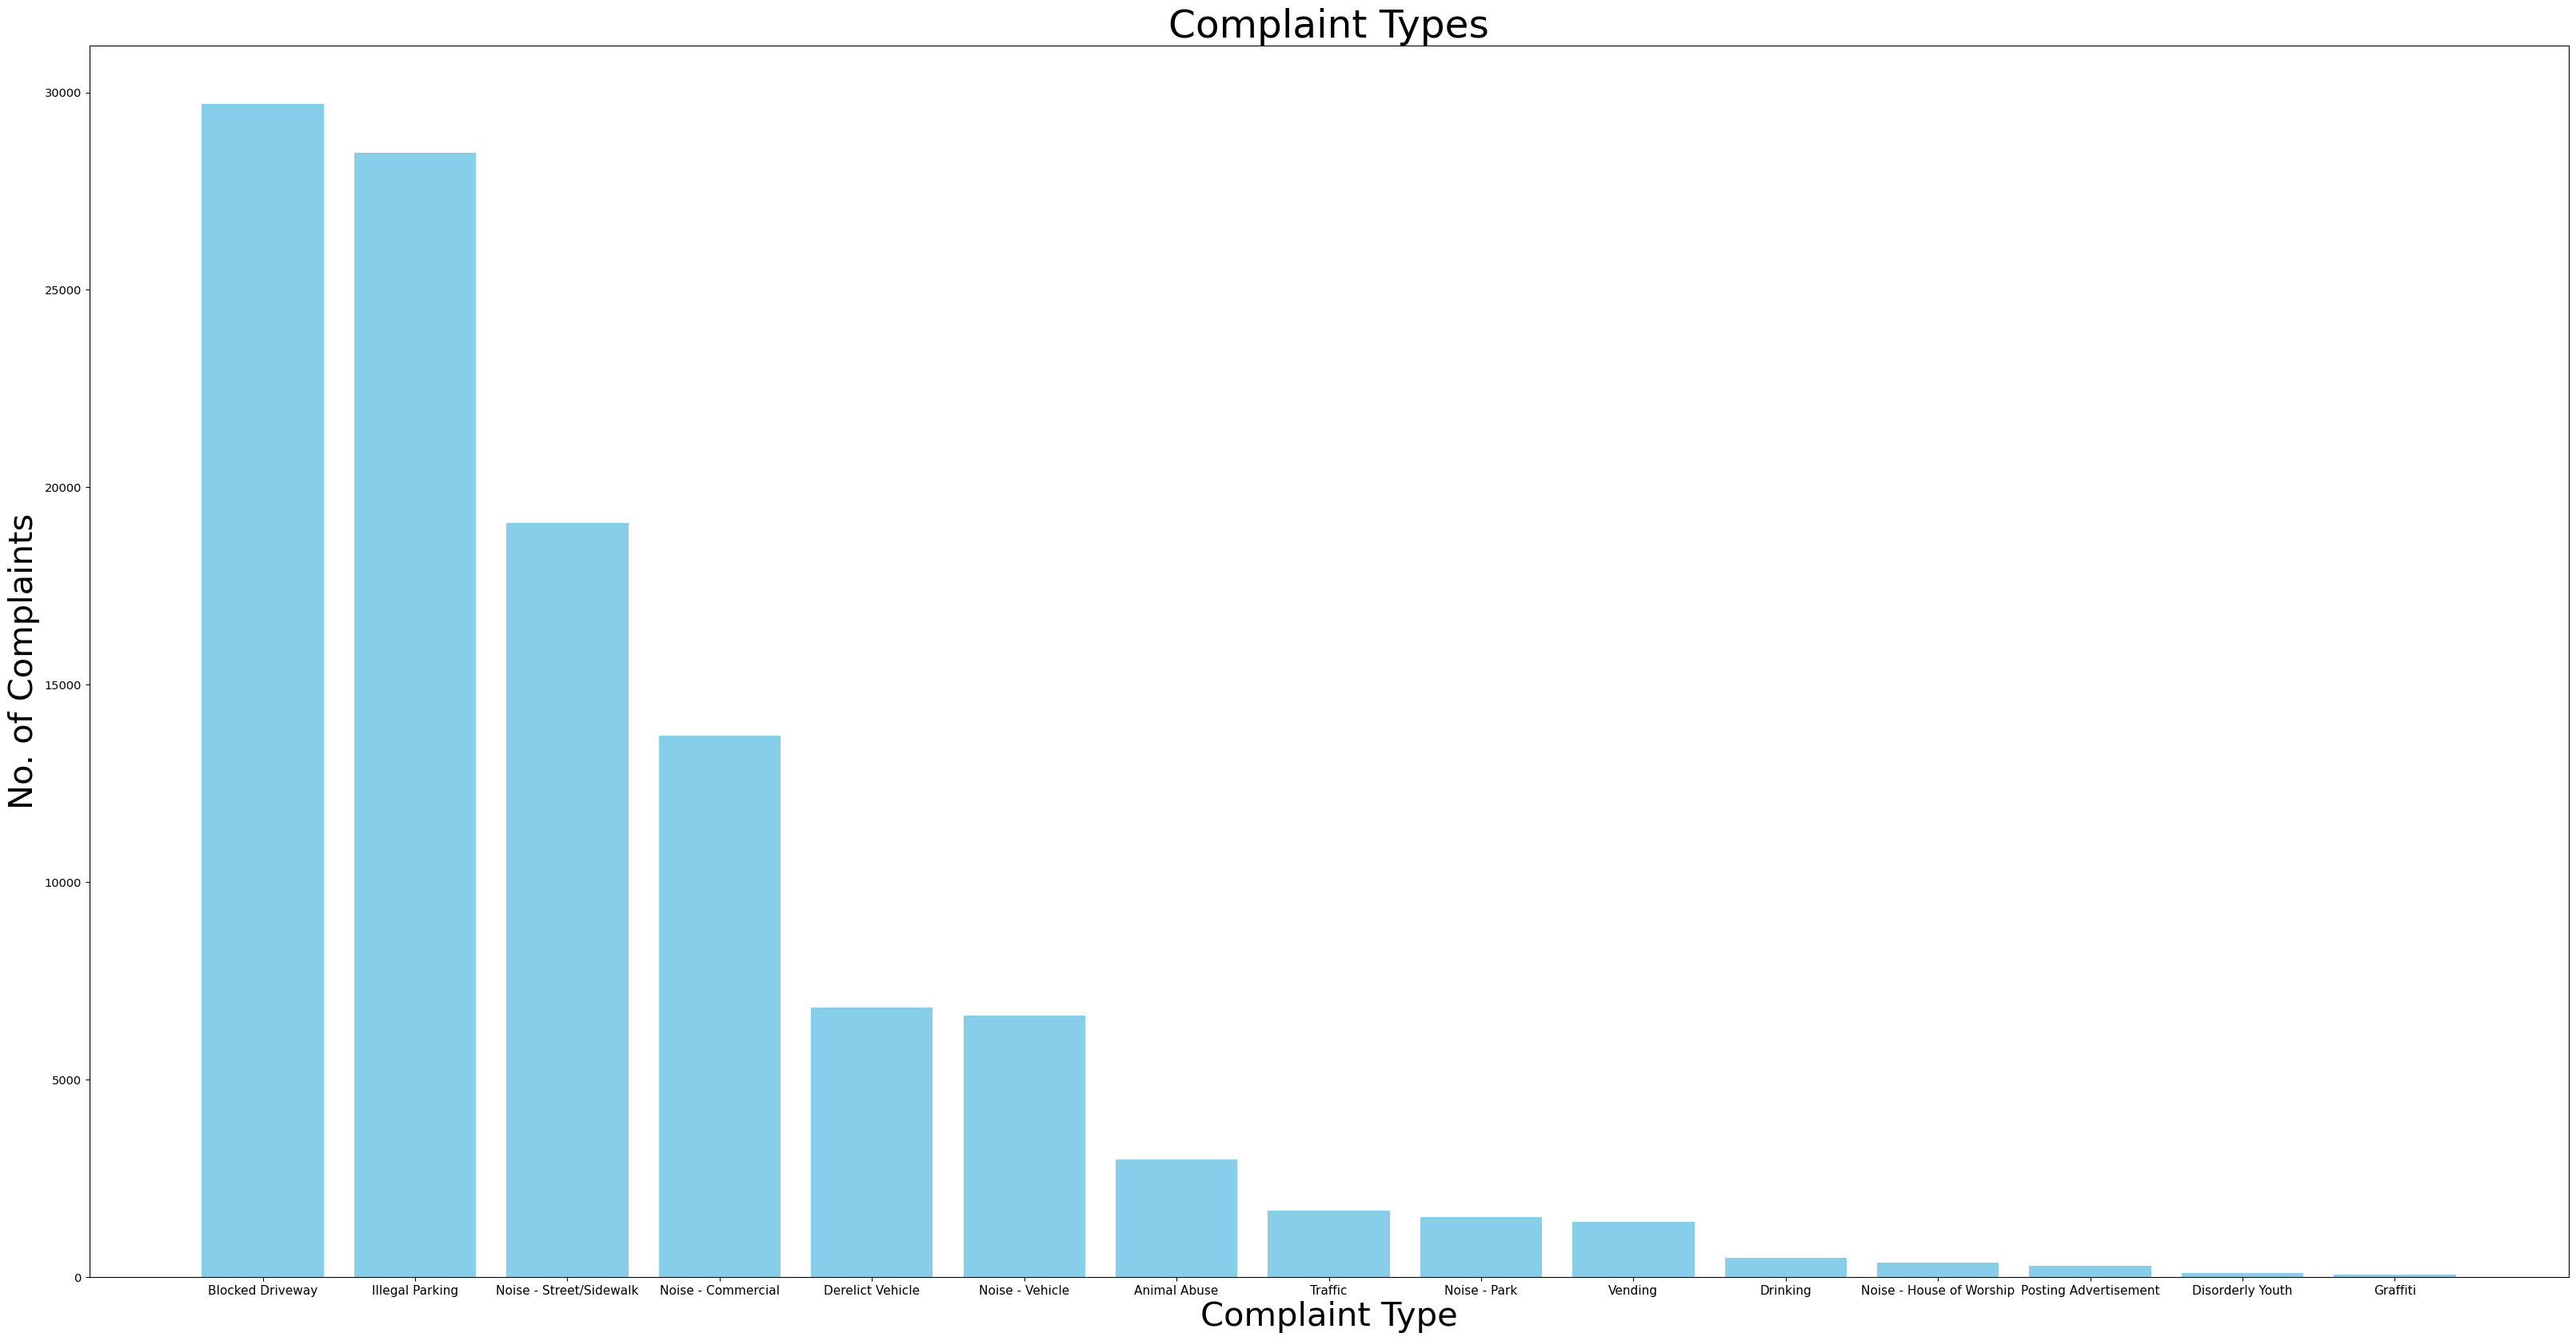

In [42]:
# Determining the size of bar plot
plt.figure(figsize=(40,20))
# creating a bar chart with complaint in x-axis and no. of complaints in y-axis
plt.bar(Complaint_Type.index,Complaint_Type.values,color='skyblue');
# tile of the plot
plt.title('Complaint Types',fontsize=35)
# label for x-axis
plt.xlabel('Complaint Type',fontsize=30)
# label for y-axis
plt.ylabel('No. of Complaints',fontsize=30)
# determining font size for x-axis bar lable
plt.xticks(fontsize=11);
# determining font size for y-axis bar lable
plt.yticks(fontsize=10.5);



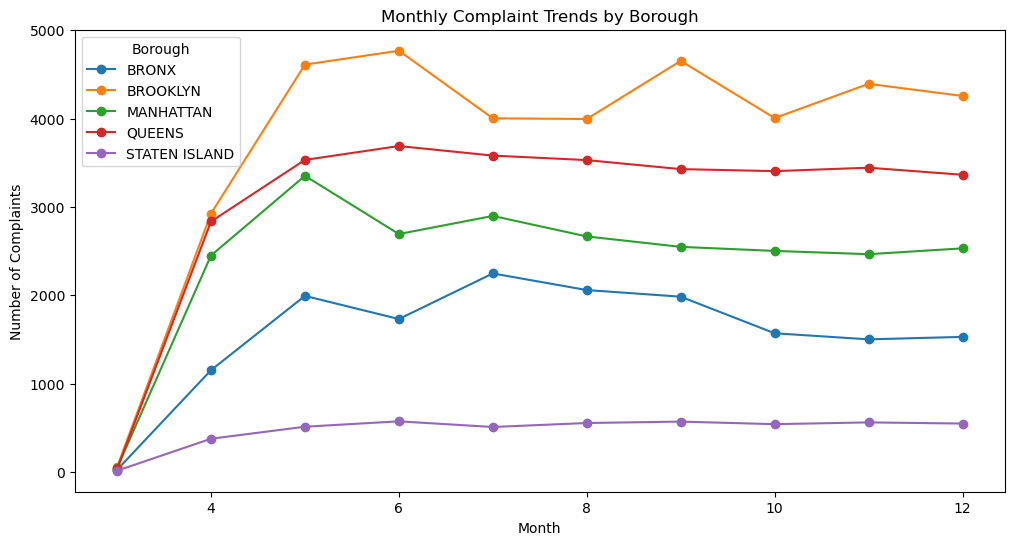

In [44]:
# Group by month and borough, count complaints, unstack to get boroughs as columns and plot line graph
df.groupby([df['Created Date'].dt.month, 'Borough']).size().unstack().plot(
    kind='line', figsize=(12, 6), marker='o', title='Monthly Complaint Trends by Borough');
# x axis label
plt.xlabel('Month')
# y axis label
plt.ylabel('Number of Complaints');



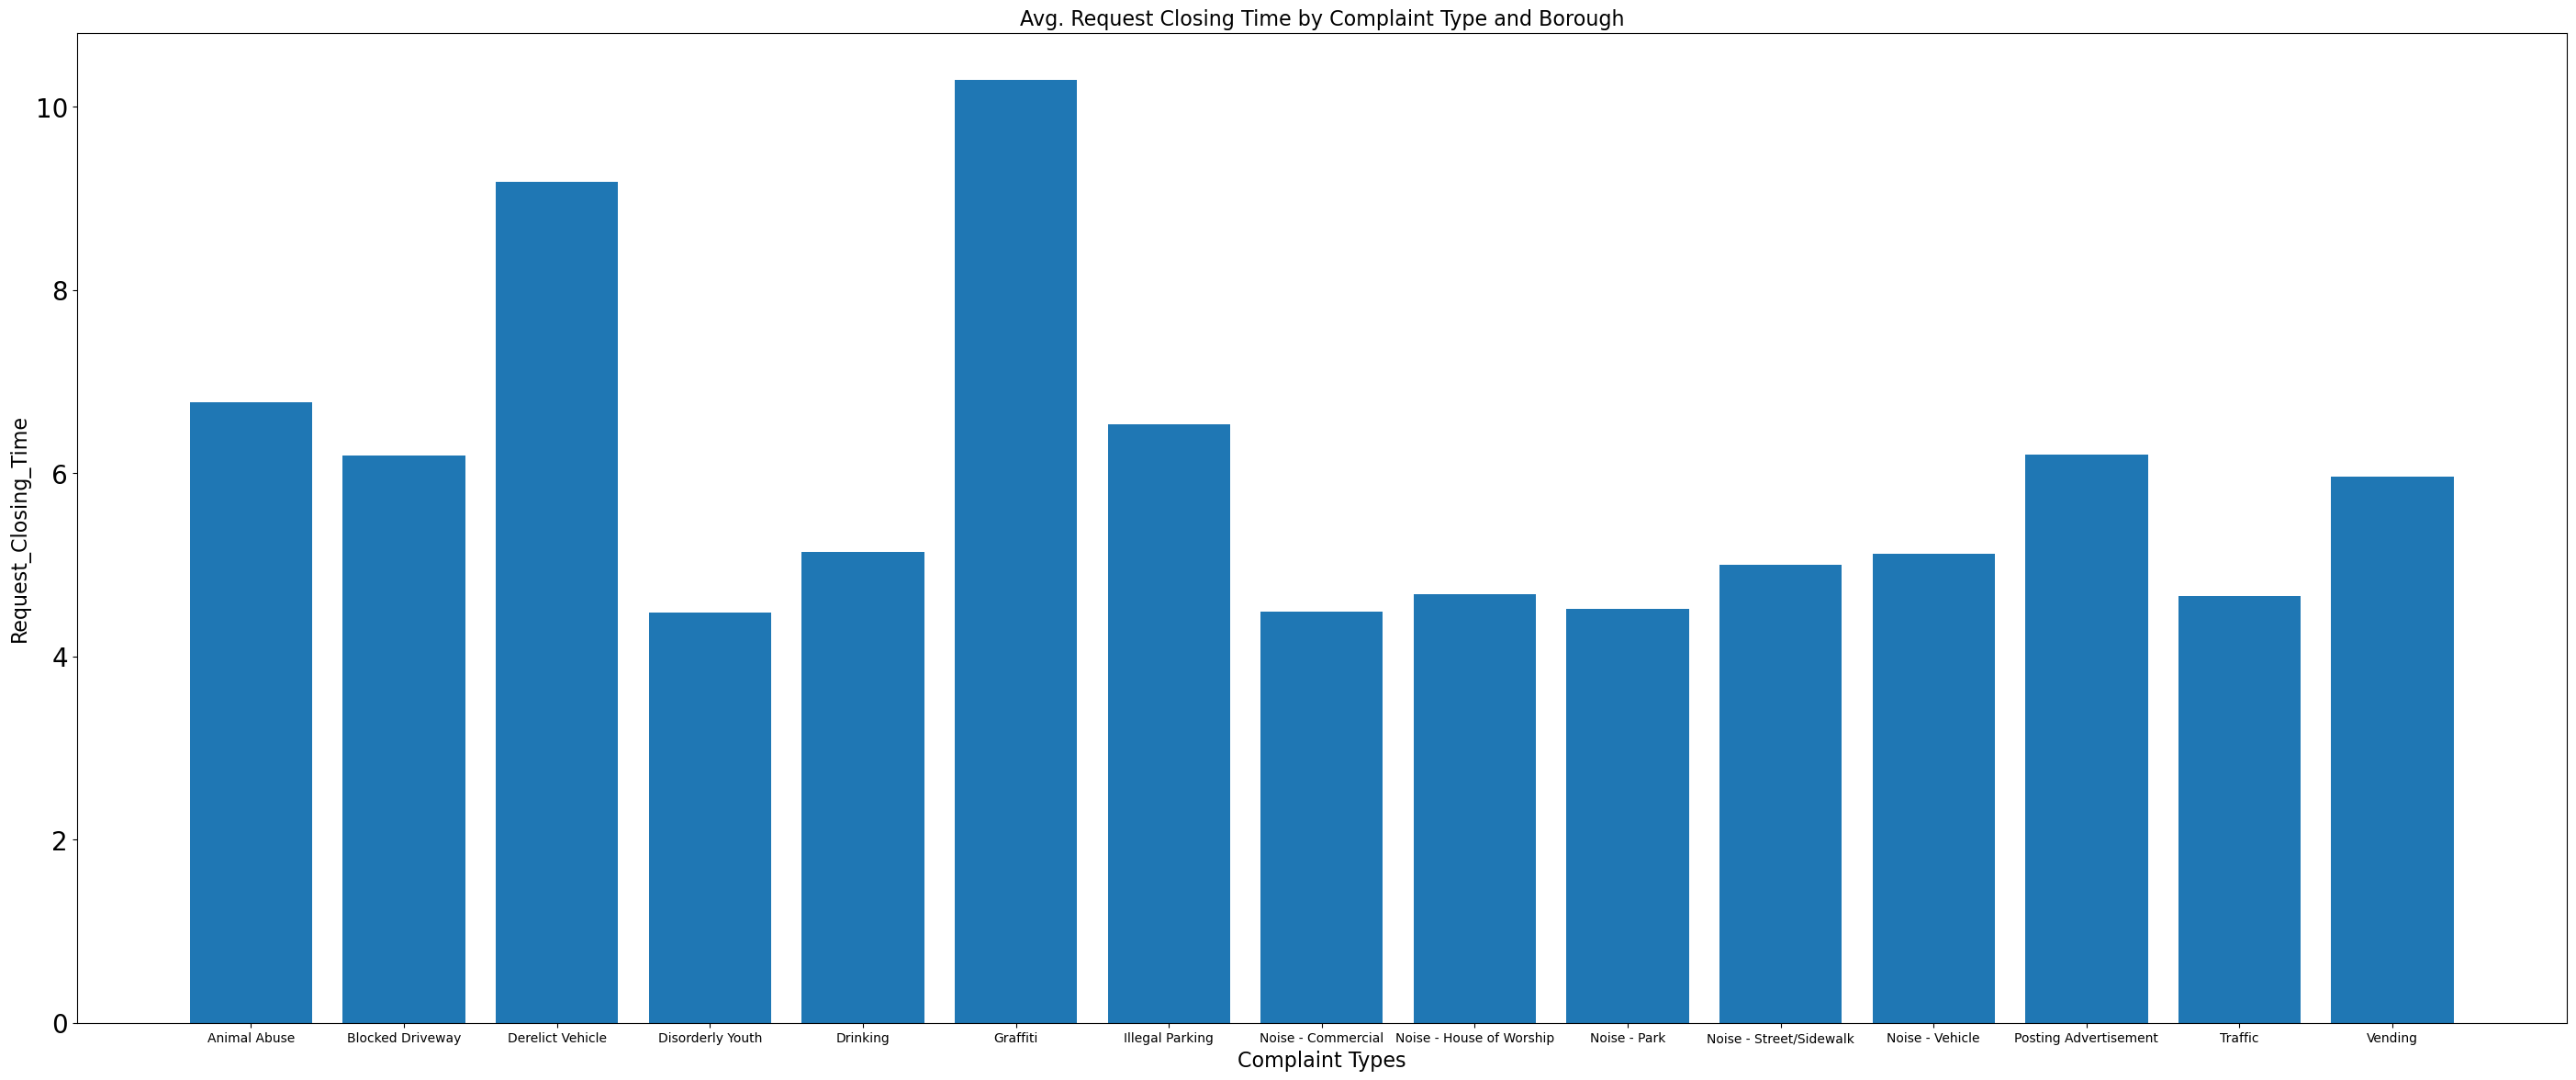

In [46]:
# group the dataset by Borough and complaint type caluclate the avg for request closing time and convert them into dataframe
groupBy=df.groupby(['Borough', 'Complaint Type'])['Request_Closing_Time'].mean().reset_index()
# Determine figure size
plt.figure(figsize=(35,14))
# ploting bar
plt.bar(groupBy['Complaint Type'],groupBy['Request_Closing_Time']);
# label for x-axis
plt.xlabel('Complaint Types',fontsize=16)
# label for y-axis
plt.ylabel('Request_Closing_Time',fontsize=16)
# font size for x-axis ticks
plt.xticks(fontsize=10)
# font size for x-axis ticks
plt.yticks(fontsize=20)
# title for bar
plt.title('Avg. Request Closing Time by Complaint Type and Borough',fontsize=16);


In [48]:
# group request closing time by complaint type and storing requesting closing time grouped by complaint type in list
groupByComplaint=df.groupby(['Complaint Type'])['Request_Closing_Time'].apply(list)

In [50]:
f_statistic,p_value=stats.f_oneway(groupByComplaint['Animal Abuse'],groupByComplaint['Blocked Driveway'],groupByComplaint['Illegal Parking'],
                                   groupByComplaint['Vending'])

In [52]:
print(f"p-value:{p_value}")

p-value:2.3651972013940353e-11


In [54]:
# import chi2_contingency to perform chi-square test
from scipy.stats import chi2_contingency
# groupby Borough and complaint type to findout different complaint across different borough and reshape into tabular form
relation_test=df.groupby(['Borough','Complaint Type']).size().unstack()

In [56]:
# chi square test to test the relation between Borough and complaint type
chi2,p,dof,expected=chi2_contingency(relation_test)

In [58]:
print(f"p-value:{p}")

p-value:0.0


In [60]:
df.groupby(['Borough', 'Complaint Type'])['Request_Closing_Time'].mean().reset_index()

,Borough,Complaint Type,Request_Closing_Time
0,BRONX,Animal Abuse,6.772859
1,BRONX,Blocked Driveway,6.190000
2,BRONX,Derelict Vehicle,9.173685
3,BRONX,Disorderly Youth,4.276468
4,BRONX,Drinking,5.137500
...,...,...,...
70,STATEN ISLAND,Noise - Street/Sidewalk,2.557498
71,STATEN ISLAND,Noise - Vehicle,2.983786
72,STATEN ISLAND,Posting Advertisement,1.973660
73,STATEN ISLAND,Traffic,3.417300


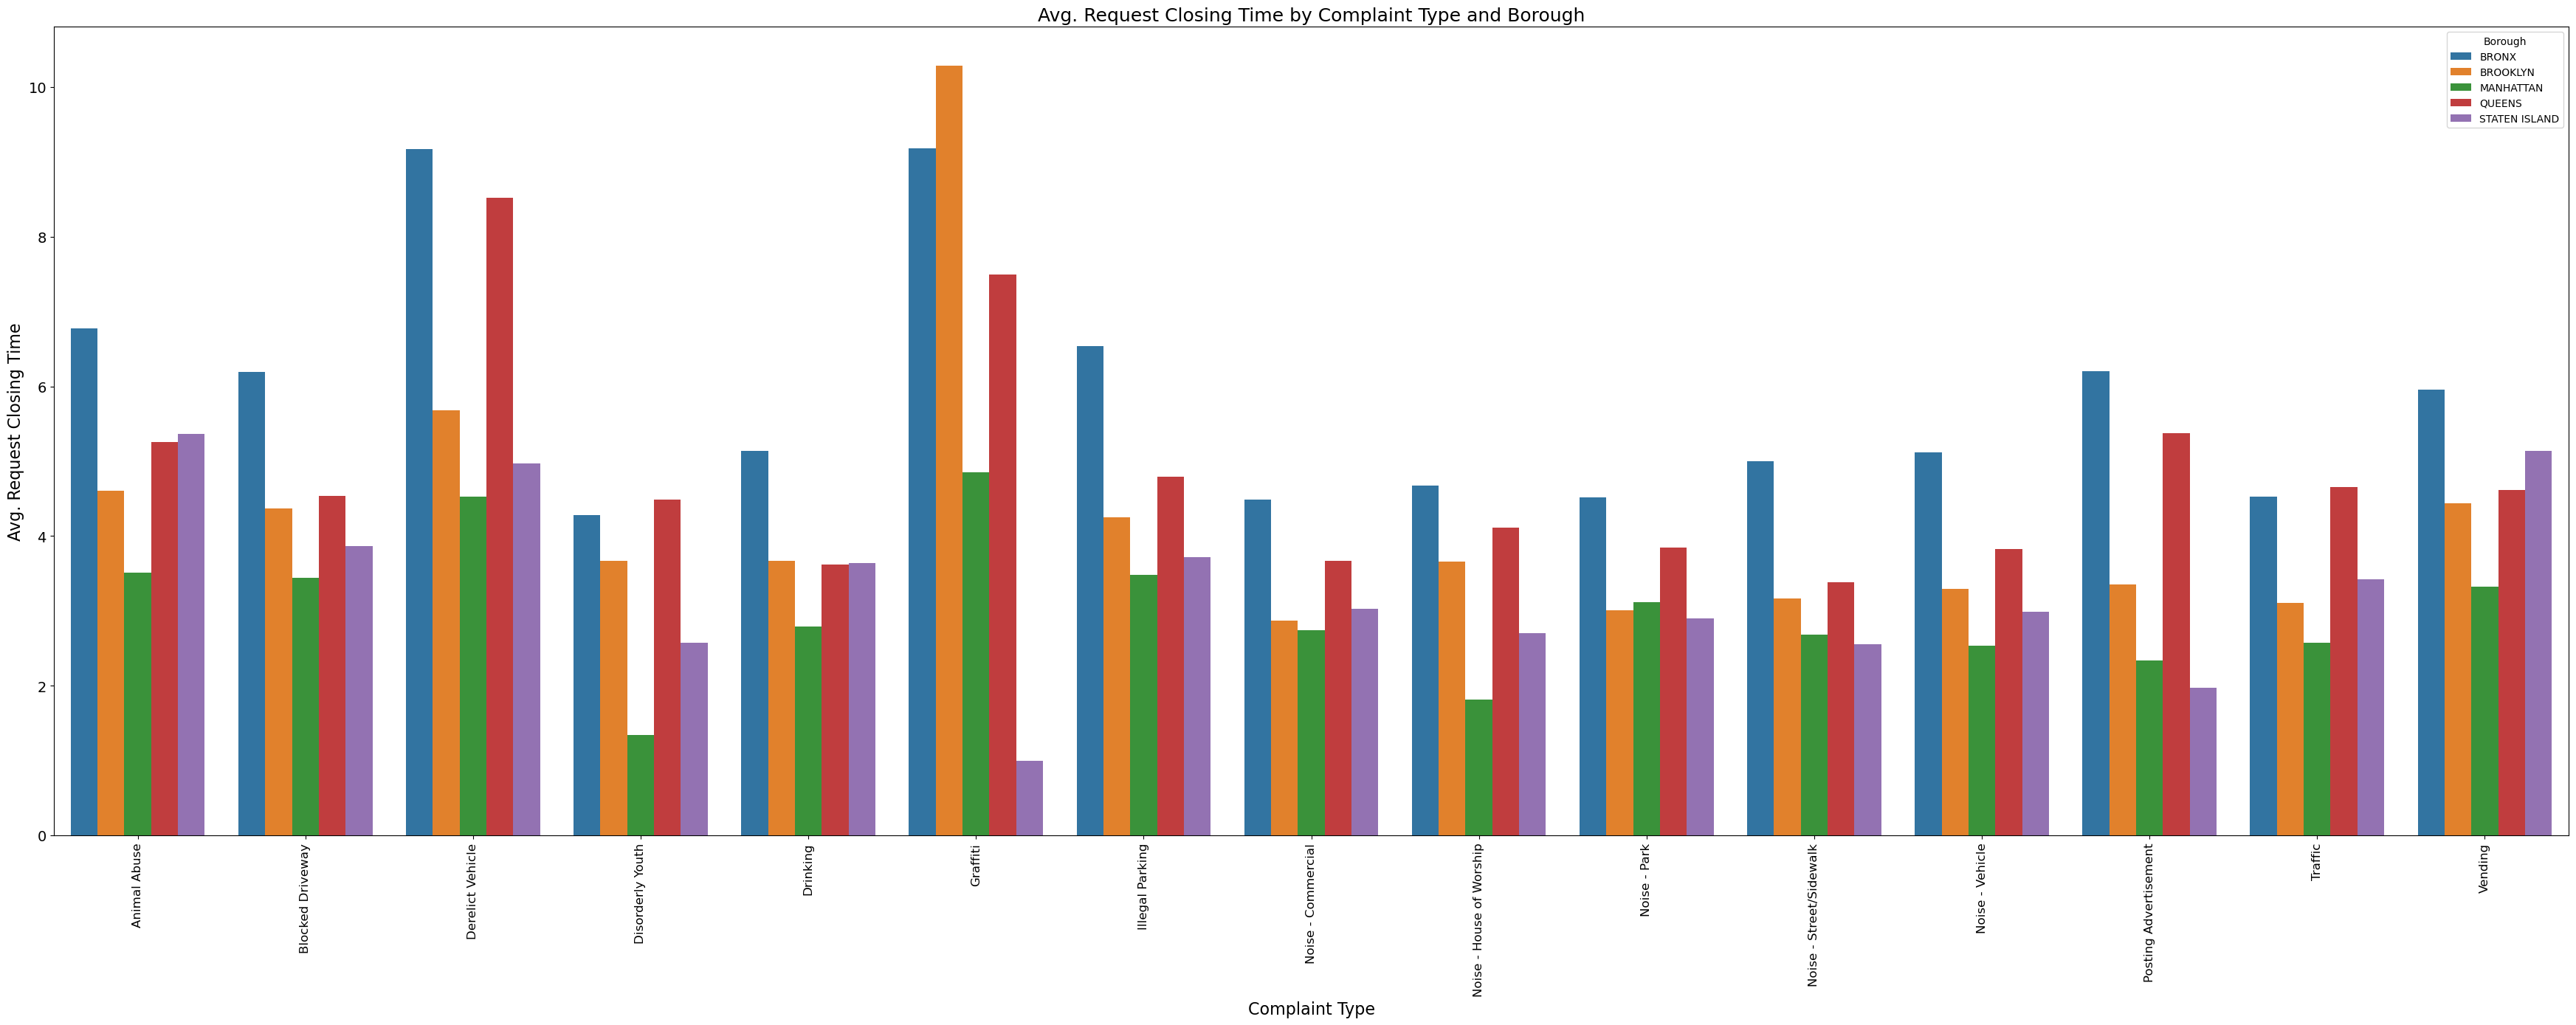

In [62]:

plt.figure(figsize=(35,14))
sns.barplot(data=groupBy, x='Complaint Type', y='Request_Closing_Time', hue='Borough')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Complaint Type', fontsize=16)
plt.ylabel('Avg. Request Closing Time', fontsize=16)
plt.title('Avg. Request Closing Time by Complaint Type and Borough', fontsize=18)
plt.legend(title='Borough')
plt.tight_layout()
plt.show()